In [1]:
!pip install pyspan
import pyspan as ps
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 6.7 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/content/natural_disasters_2024.csv')
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


In [3]:
df.shape



(10000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [5]:
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [6]:
D_data = ps.detect_outliers(df, columns=['Fatalities'], method='iqr', threshold=1.5)

Total number of outliers detected across columns: 0
Original data shape: (10000, 7)
Data shape after removing outliers: (10000, 7)


In [7]:
df.isnull().sum()

,0
Disaster_ID,0
Disaster_Type,0
Location,0
Magnitude,0
Date,0
Fatalities,0
Economic_Loss($),0


In [ ]:
df.shape

(18979, 77)

In [8]:
D_data.columns

Index(['Disaster_ID', 'Disaster_Type', 'Location', 'Magnitude', 'Date',
       'Fatalities', 'Economic_Loss($)'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt

In [10]:
count = D_data['Location'].value_counts().head()
count

,count
Location,
Brazil,1743
India,1677
Indonesia,1649
Japan,1648
USA,1646


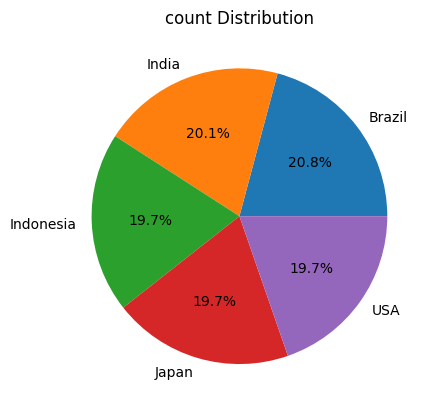

In [11]:
plt.pie(count,
        labels=count.index,
         autopct='%1.1f%%')
plt.title('count Distribution')
plt.show()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,ID,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Team & Contract_1,Team & Contract_2
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,158023,...,5 ★,85,92,91,95,38,65,\n372,FC Barcelona 2004,2021
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,...,5 ★,89,93,81,89,35,77,\n344,Juventus 2018,2022
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,200389,...,3 ★,87,92,78,90,52,90,\n86,Atlético Madrid 2014,2023
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,...,4 ★,76,86,93,88,64,78,\n163,Manchester City 2015,2023
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,190871,...,5 ★,91,85,86,94,36,59,\n273,Paris Saint-Germain 2017,2022
